## Numerical integration of coupled first-order ODEs

Uses `odeint()` function from the `integrate` submodule of `scipy`.

Marty Ligare, August 2020

####  Damped harmonic oscillator
The equation of motion for a damped harmonic oscillator is 
$$ \frac{d^2x}{dt^2} = -\omega_0^2\, x - \gamma \frac{dx}{dt}. $$
Working with dimensionless variables in which time is measured in 
units of $\omega_0^{-1}$ this equation of motion can be rewritten as 
$$ \frac{d^2x}{dt^2} = -x - b\frac{dx}{dt},  $$
where $b = \gamma/\omega_0$.

This second order differential equation can be written as two coupled first-order equations:

\begin{eqnarray*}
\frac{dx}{dt} &=& v\\
\frac{dv}{dt} &=& -x - bv
\end{eqnarray*}

The function below returns the RHS of these differential equations; the lines above the `return` relates the elements of the array `u[i]` with variables that have more physical meaning.

In [2]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# Following sets up LateX fonts
#mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#mpl.rc('text', usetex=True)

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', autolayout = True)  # Adjusts supblot parameters for new size

In [4]:
def damped_osc(u,t):
    '''Function returning first-order derivatives of the dependent 
    quantities x and v. The values of x and v are passed in the 
    two-element array u, where u[0] and u[1] correspond to x and v 
    respectively.'''
    x = u[0]
    v = u[1]
    return (v,-x-b*v)

#### Initial conditions, and parameter(s)

In [5]:
x0 = 2   # initial position
v0 = 0   # initial velocity
b = 0.4  # camping parameter
u0 = np.array([x0,v0])

In following cell:
- Choose points for output.<br>
- Integrate.<br>
<b>Note:</b> `odeint` returns an array:<br>
  `[[x_0  v_0],`<br>
  `[x_1  v_1],`<br>
  `[x_2  v_2], ...]`<br>
  To get single list for `x` and single list for `v` we need the transpose of the returned array.<br>
  (Could also keep return as a single array if that's more useful down the road.)

In [6]:
t = np.linspace(0,20,201)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = integrate.odeint(damped_osc,u0,t).T

In [7]:
plt.figure()
plt.plot(t,x)
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


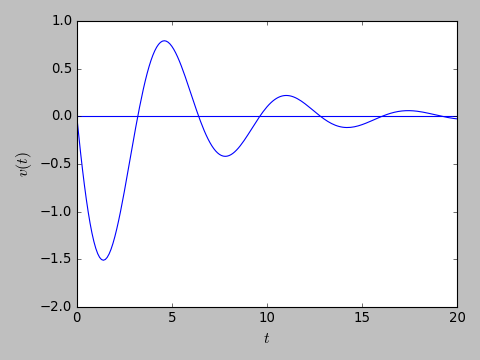

In [8]:
plt.figure()
plt.plot(t,v);
plt.axhline(0)
plt.xlabel('$t$')
plt.ylabel('$v(t)$');

<IPython.core.display.Javascript object>


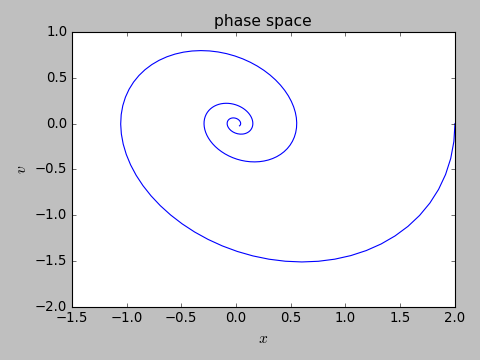

In [9]:
plt.figure()
plt.xlabel("$x$")
plt.ylabel("$v$")
plt.title("phase space",fontsize=14)
plt.plot(x,v);

#### Version Information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [10]:
%load_ext version_information

In [11]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 15:23:39 2020 EDT